# Fashion MNIST digits classification dataset

In [47]:
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.models import Sequential

from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
x_train[0].shape

(28, 28)

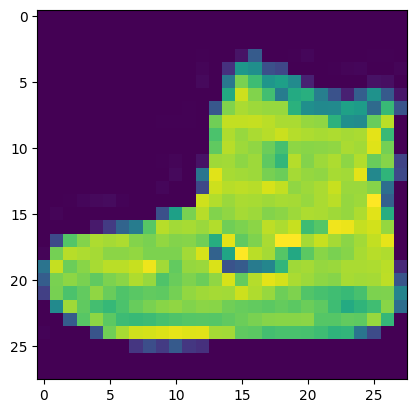

In [6]:
plt.imshow(x_train[0])

In [7]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

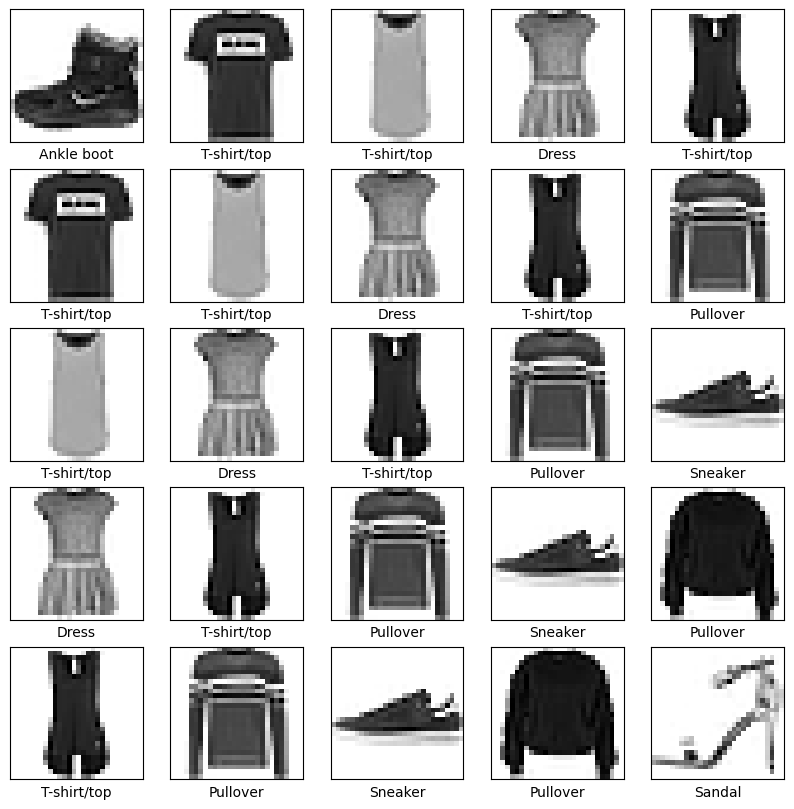

In [8]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(0,5):
  for j in range(0,5):
    axes[i,j].grid(False)
    axes[i,j].imshow(x_train[i+j],cmap='binary')
    axes[i,j].set_xlabel(label_name[y_train[i+j]])
    axes[i,j].set_xticks([])
    axes[i,j].set_yticks([])

In [9]:
x_train[1][1]

array([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
       255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
         0,   0], dtype=uint8)

In [10]:
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
x_train[1][1]

array([0.        , 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
       0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
       1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
       0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [12]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
print(x_train[1].shape)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_test[1].shape)

(28, 28, 1)
(28, 28, 1)


In [13]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [14]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [15]:
def optimizer_model(optimizer):
  model=Sequential()
  model.add(Flatten())
  model.add(Dense(input_shape=(28,28,1),units=128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(units=64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [16]:
optimizers=['adam','RMSprop','Adadelta','SGD','Adagrad']
for optimizer in optimizers:
  print('Optimizer: ',optimizer)
  model=optimizer_model(optimizer)
  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Optimizer:  adam


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7337 - loss: 0.7759 - val_accuracy: 0.8379 - val_loss: 0.4598
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8183 - loss: 0.5142 - val_accuracy: 0.8426 - val_loss: 0.4283
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8319 - loss: 0.4700 - val_accuracy: 0.8437 - val_loss: 0.4374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8345 - loss: 0.4644 - val_accuracy: 0.8486 - val_loss: 0.4131
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8341 - loss: 0.4605 - val_accuracy: 0.8449 - val_loss: 0.4099
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8404 - loss: 0.4472 - val_accuracy: 0.8338 - val_loss: 0.4444
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8410 - loss: 0.4412 - val_accuracy: 0.8567 - val_loss: 0.3987
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8456 - loss: 0.4


#### Adam : accuracy: 0.8455 - loss: 0.4257 - val_accuracy: 0.8602 - val_loss: 0.3869

#### RMSprop : accuracy: 0.8640 - loss: 0.3905 - val_accuracy: 0.8654 - val_loss: 0.3803

#### Adadelta : accuracy: 0.5889 - loss: 1.2085 - val_accuracy: 0.6955 - val_loss: 0.9344

#### SGD : accuracy: 0.8581 - loss: 0.3947 - val_accuracy: 0.8705 - val_loss: 0.3682

#### Adagrad : accuracy: 0.7979 - loss: 0.5965 - val_accuracy: 0.8308 - val_loss: 0.4837

#### conclusion : RMSprop, Adam, and SGD optimizers performed well, with high accuracy and low loss on both training and validation sets. We can use these optimizers and vary learning rate and try to get the model with highest accuracy & minimum loss.

In [50]:
callback=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=10)

In [51]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,callbacks=callback)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7591 - loss: 0.6674 - val_accuracy: 0.8220 - val_loss: 0.4932
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8598 - loss: 0.3824 - val_accuracy: 0.8634 - val_loss: 0.3762
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8746 - loss: 0.3422 - val_accuracy: 0.8618 - val_loss: 0.3908
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8824 - loss: 0.3181 - val_accuracy: 0.8756 - val_loss: 0.3499
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8892 - loss: 0.3019 - val_accuracy: 0.8755 - val_loss: 0.3668
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8977 - loss: 0.2795 - val_accuracy: 0.8457 - val_loss: 0.4508
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8973 - loss: 0.2762 - val_accuracy: 0.8691 - val_loss: 0.3828
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8996 - loss: 0.2694 - val_accu

In [58]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
hist1=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,callbacks=callback)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7552 - loss: 0.7023 - val_accuracy: 0.8156 - val_loss: 0.5078
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8465 - loss: 0.4285 - val_accuracy: 0.8360 - val_loss: 0.4686
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8552 - loss: 0.3990 - val_accuracy: 0.8436 - val_loss: 0.4435
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8645 - loss: 0.3762 - val_accuracy: 0.8369 - val_loss: 0.4612
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8650 - loss: 0.3744 - val_accuracy: 0.8570 - val_loss: 0.4141
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8660 - loss: 0.3645 - val_accuracy: 0.8265 - val_loss: 0.4706
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8708 - loss: 0.3523 - val_accuracy: 0.8486 - val_loss: 0.4634
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8712 - loss: 0.3544 - val_acc

In [68]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=SGD(momentum=0.0,nesterov=False),loss='categorical_crossentropy',metrics=['accuracy']) # SGD
hist2=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,callbacks=callback)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6135 - loss: 1.2248 - val_accuracy: 0.7849 - val_loss: 0.6235
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8047 - loss: 0.5711 - val_accuracy: 0.8142 - val_loss: 0.5347
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8255 - loss: 0.5057 - val_accuracy: 0.8075 - val_loss: 0.5272
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8340 - loss: 0.4747 - val_accuracy: 0.8235 - val_loss: 0.5063
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8444 - loss: 0.4465 - val_accuracy: 0.8288 - val_loss: 0.4773
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8489 - loss: 0.4319 - val_accuracy: 0.7880 - val_loss: 0.5555
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8547 - loss: 0.4187 - val_accuracy: 0.8407 - val_loss: 0.4468
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8606 - loss: 0.4038 - val_accu

In [69]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=SGD(momentum=0.9,nesterov=False),loss='categorical_crossentropy',metrics=['accuracy']) # Momentum
hist3=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,callbacks=callback)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7251 - loss: 0.7975 - val_accuracy: 0.8324 - val_loss: 0.4726
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8485 - loss: 0.4209 - val_accuracy: 0.8515 - val_loss: 0.4132
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8673 - loss: 0.3646 - val_accuracy: 0.8528 - val_loss: 0.4074
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8765 - loss: 0.3376 - val_accuracy: 0.8654 - val_loss: 0.3725
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8818 - loss: 0.3271 - val_accuracy: 0.8698 - val_loss: 0.3572
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8855 - loss: 0.3089 - val_accuracy: 0.8754 - val_loss: 0.3424
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8921 - loss: 0.2940 - val_accuracy: 0.8723 - val_loss: 0.3554
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8951 - loss: 0.2816 - val_accu

In [70]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy']) # NAG
hist4=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,callbacks=callback)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7404 - loss: 0.7540 - val_accuracy: 0.8451 - val_loss: 0.4470
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8567 - loss: 0.4072 - val_accuracy: 0.8517 - val_loss: 0.4122
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8716 - loss: 0.3571 - val_accuracy: 0.8639 - val_loss: 0.3818
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8794 - loss: 0.3318 - val_accuracy: 0.8645 - val_loss: 0.3746
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8836 - loss: 0.3147 - val_accuracy: 0.8654 - val_loss: 0.3652
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8888 - loss: 0.2993 - val_accuracy: 0.8558 - val_loss: 0.3907
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8931 - loss: 0.2884 - val_accuracy: 0.8742 - val_loss: 0.3526
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8974 - loss: 0.2784 - val_accu

Text(0, 0.5, 'Accuracy')

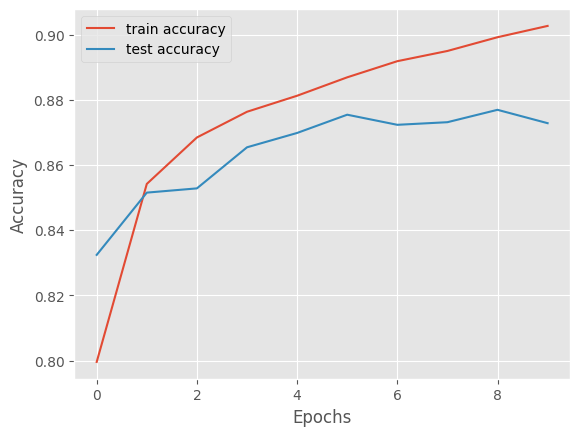

In [75]:
plt.style.use('ggplot')
plt.plot(np.arange(0,10), hist3.history['accuracy'], label='train accuracy')
plt.plot(np.arange(0,10),hist3.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

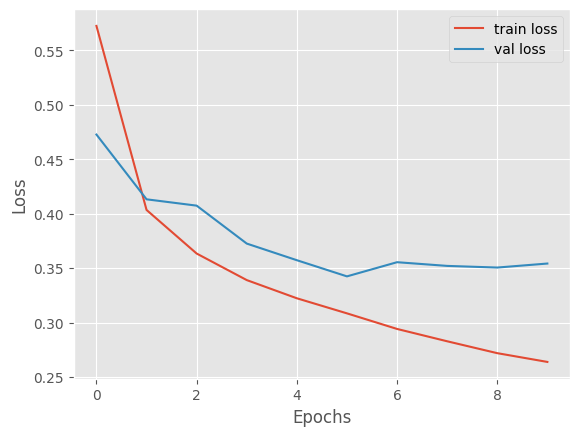

In [77]:
plt.style.use('ggplot')
plt.plot(np.arange(0,10),hist3.history['loss'],label='train loss')
plt.plot(np.arange(0,10),hist3.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

#### Adam : Decent performance but slightly higher validation loss than NAG and Momentum. (accuracy: 0.8766 - loss: 0.3401 - val_accuracy: 0.8659 - val_loss: 0.4068)

#### RMSprop : Best training accuracy but relatively higher validation loss. (accuracy: 0.9157 - loss: 0.2332 - val_accuracy: 0.8803 - val_loss: 0.4110)

#### SGD : Least effective in this comparison, indicating the need for additional techniques to improve performance on this dataset.(accuracy: 0.8627 - loss: 0.3929 - val_accuracy: 0.8451 - val_loss: 0.4309)

#### Momentum : Also very effective, with good generalization performance. (accuracy: 0.9026 - loss: 0.2653 - val_accuracy: 0.8728 - val_loss: 0.3542)

#### NAG : Best overall performance with a good balance between training accuracy, validation accuracy, and the lowest validation loss. (accuracy: 0.9033 - loss: 0.2585 - val_accuracy: 0.8775 - val_loss: 0.3403)

## Conclusion: NAG appears to be the most effective optimizer for the Fashion MNIST dataset based on these results, providing the best balance of training and validation performance.

